# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка и подготовка данных
data = pd.read_csv("./data/Advertising.csv", index_col=0)

# Выведем данные по таблице
display(data.head())
print(data.describe(),data.info())


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000 None


----

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
# Отпринтуем пропуски
print(data.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


> Пропусков в данных нет, но если посмотреть на статистики на прошлом этапе, можно отметить нулевые значения в столбце радио, проверим их количество и удалим, если они не имеют большого веса в контексте выборки (в этом случае, можно будет предположить, что нулевые значения не являются пропусками, а скорее допустимой характеристикой переменной)

In [4]:
# Отфильтруем по минимальному-нулевому значению
data[data["radio"] == data["radio"].min()]

,TV,radio,newspaper,sales
128,80.2,0.0,9.2,8.8


> Как видно нулевое значение наличествует только в 1 строке, что можно рассмотреть как пропуск, удалим его

In [5]:
# Вырежем через фильтрацию
data = data[data["radio"] != data["radio"].min()]

# Посмотрим на полученный результат
display(data.head())
print(data.describe(),data.info())

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         199 non-null    float64
 1   radio      199 non-null    float64
 2   newspaper  199 non-null    float64
 3   sales      199 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
               TV       radio   newspaper       sales
count  199.000000  199.000000  199.000000  199.000000
mean   147.378392   23.380905   30.661307   14.048744
std     85.938922   14.791683   21.780479    5.217365
min      0.700000    0.300000    0.300000    1.600000
25%     74.050000   10.050000   12.850000   10.400000
50%    149.800000   23.300000   25.900000   12.900000
75%    219.150000   36.550000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000 None


> Нулевые и пропущенные значения отсутсвуют. Задача выполнена.
___

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [6]:
# ваш код
X = np.array(data.drop(columns=["sales"], axis=1))
y = np.array(data["sales"])


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [7]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [8]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [9]:
# Исправленный код алгоритма, приведенного в задании
w = np.zeros(X.shape[1])
iterations = 1000

for iteration in range(iterations):
    r = y - np.dot(X, w)  # Вычисляем остатки

    for j in range(X.shape[1]):
        # Вычисляем остаток без j-го веса
        r_j_prev = r + X[:, j] * w[j]
        # Обновляем вес w[j]
        w[j] = np.dot(X[:, j], r_j_prev)
        # Обновляем остатки
        r = r_j_prev - X[:, j] * w[j]

print(w)

[ 40.6711837  110.28460324  73.93424192  -0.42416681]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[ 40.6711837  110.28460324  73.93424192  -0.42416681]


Если вы все сделали верно, они должны практически совпасть!

> Результаты идентичны

----

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы еще не нормализовали). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [11]:
# Реинициализируем наше добро
X = np.array(data.drop(columns=["sales"], axis=1))
y = np.array(data["sales"])

In [12]:
# Нормируем
def normalize(X):
    """Нормализует матрицу признаков.

    Args:
        X (numpy array): Данные, которые необходимо нормализовать.

    Returns:
        numpy array: Нормализованные данные.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Проверка на ноль
    std[std == 0] = 1

    return (X - mean) / std

X_norm = normalize(X)

**Добавим единичный столбец**

In [13]:
X_norm = np.hstack([np.ones(X_norm.shape[0]).reshape(-1, 1), X_norm])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [14]:
# Функция MSE
def mse_error(y_test, y_pred, round_n=3):
    """Вычисляет среднеквадратическую ошибку (MSE).

    Args:
        y_test (numpy array): Истинные целевые значения.
        y_pred (numpy array): Предсказанные значения.
        round_n (int): Количество знаков после запятой для округления.

    Returns:
        float: Значение MSE, округленное до указанного количества знаков.
    """
    mse = np.mean(np.square(y_test - y_pred))
    return np.round(mse, round_n)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [15]:
# Формируем прогноз на основе прокидывания среднего значения
y_mean = np.mean(y)  # Вычисляем среднее значение
y_pred_mean = np.full_like(
    y, y_mean
)  # Создаем массив формы y, заполенный средним значением
mse_err = mse_error(y, y_pred_mean)
print(f"MSE на прогнозе средним: {mse_err}")

MSE на прогнозе средним: 27.084


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [16]:
# Функция предсказания
def lin_pred(X, w):
    """Предсказания с помощью модели линейной регрессии.

    Args:
        X (numpy array): Массив признаков.
        w (numpy array): Веса модели.

    Returns:
        numpy array: Предсказанные значения.
    """
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [32]:
# Функция шага градиента с SGD
def stoch_grad_step(X, y, w, train_ind, eta=0.1):
    """Выполняет один шаг градиентного спуска.

    Args:
        X (numpy array): Матрица признаков.
        y (numpy array): Вектор целевых переменных.
        w (numpy array): Вектор весов модели.
        train_ind (int): Индекс объекта выборки.
        eta (float): Шаг градиента.

    Returns:
        numpy array: Обновленный вектор весов.
    """
    x_i = X[train_ind]  # Получение текущей строки
    y_i = y[train_ind]  # Получение целевого значения

    # Предсказание и ошибка
    predicted = lin_pred(x_i, w)
    error = predicted - y_i

    # Обновление весов
    w[0] -= eta * error # Обновление свободного члена без нормировки 
    w[1:] -= eta * error * x_i[1:] / len(X)  # Обновление остальных весов с нормировкой

    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [33]:
def stochastic_gradient_descent(
    X, y, w_init, learning_rate, max_iter, tol_level, random_seed=42,
):
    """Градиентный спуск

    Args:
        X (numpy array): матрица признаков
        y (numpy array): вектор целевых переменных
        w_init (numpy array): вектор инициализации весов модели
        learning_rate (float): темп обучения
        max_iter (int): максимальное число итераций
        tol_level (float): уровень близости для остановки
        random_seed (int): значение начального семени для генератора случайных чисел

    Returns:
        tuple: финальный вектор весов и список ошибок за итерации
    """
    
    np.random.seed(random_seed)
    w_new = w_init.copy() # Создаем копию вектора весов
    errors = [] # Список для хранения значений ошибок
    iters = 0 # Инициируем количество итераций для последующей возможности остановки
    
    distance = np.inf  # Задаем начальное расстояние для контроля tol_level

    while distance > tol_level and iters < max_iter:
        train_ind = np.random.randint(len(y))  # Берем один случайный индекс
        w_old = w_new.copy()
        
        # Шаг градиента
        w_new = stoch_grad_step(X, y, w_new, train_ind, learning_rate)
        
        # Предсказания
        y_pred = lin_pred(X, w_new)
        
        # Вычисление MSE
        mse = mse_error(y_test=y, y_pred=y_pred)
        errors.append(mse)
        
        # Вычисляем расстояние между старыми и новыми весами
        distance = np.linalg.norm(w_new - w_old)

        iters += 1  # Увеличиваем количество итераций

    return w_new, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [34]:
def grad_with_visuals(X, y, learning_rate=0.01, max_iter=1e5, tol_level=1e-6):
    """Функция для выполнения стохастического градиентного спуска с визуализацией ошибок.

    Args:
        X (numpy array): Матрица признаков.
        y (numpy array): Вектор целевых переменных.
        learning_rate (float): Темп обучения.
        max_iter (int): Максимальное количество итераций.
        tol_level (float): Уровень близости для остановки.

    Returns:
        tuple: Предсказанные значения и список ошибок за итерации.
    """
    # Инициализация весов нулями, количество весов соответствует числу признаков
    w_init = np.zeros(X.shape[1])
    
    # Выполняем стохастический градиентный спуск
    sgd_pred, sgd_err = stochastic_gradient_descent(
        X=X, y=y, w_init=w_init, 
        learning_rate=learning_rate, 
        max_iter=max_iter, tol_level=tol_level
    )

    # Создаем словарь, где ключами будут номера итераций, а значениями - ошибки
    error_dict = {i: j for i, j in enumerate(sgd_err)}
    
    # Преобразуем словарь в DataFrame для удобной обработки
    error_frame = (
        pd.DataFrame(pd.Series(error_dict))
        .reset_index()  # Сбрасываем индекс
        .set_axis(["Итерация", "Ошибка"], axis=1)  # Задаем названия столбцов
    )

    # Визуализация
    plt.figure(figsize=(12, 6))  # Определяем размеры графика
    sns.lineplot(x=error_frame["Итерация"], y=error_frame["Ошибка"], color="green")  # Строим график зависимости ошибки от итерации
    plt.title("Зависимость ошибки от номера итерации")  # Название графика
    plt.xlabel("Итерация")  # Подпись для оси X
    plt.ylabel("Ошибка (MSE)")  # Подпись для оси Y
    plt.show()  # Отображение графика

    return sgd_pred, sgd_err  # Возвращаем предсказанные значения и ошибки

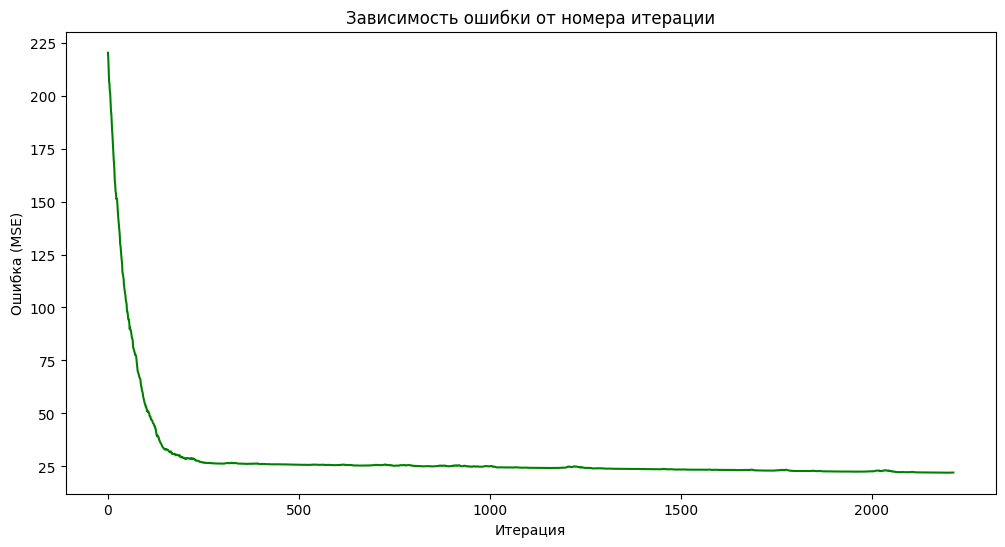

In [35]:
sgd_pred, sgd_err = grad_with_visuals(X=X_norm, y=y)

> Можно отметить, что в целом ошибка стабилизировалась достаточно быстро, но оптимум так и не был достигнут, возможно проблема в шаге градиента, величина которого заставляет перепрыгивать минимум.

**Выведите вектор весов, к которому сошелся метод.**

In [36]:
# Вывод весов
print(sgd_pred)

[14.3818618   0.42412047  0.3029221   0.10957508]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [37]:
# Вывод финальной ошибки
print(sgd_err[-1])

22.006


---

### Проверка встренным алгоритмом

In [39]:
from sklearn.linear_model import SGDRegressor

# Создание и обучение модели с помощью стохастического градиентного спуска
sgd_reg = SGDRegressor(fit_intercept=False,max_iter=1000000, tol=1e-6, random_state=42)
sgd_reg.fit(X_norm, y)

# Вывод весов
sgd_reg.coef_

array([14.04442844,  3.93425536,  2.78770858, -0.01464352])

> Как можно заметить вектор весов весьма близок к ручной реализации, что можно считать успехом.